In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2025-01-08 20:38:57.229801: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 20:38:57.232978: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 20:38:57.241055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736379537.256424   70349 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736379537.260863   70349 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 20:38:57.276572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Dataset and Doc

https://keras.io/api/datasets/mnist/

https://yann.lecun.com/exdb/mnist/

In [2]:
dataset = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = dataset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

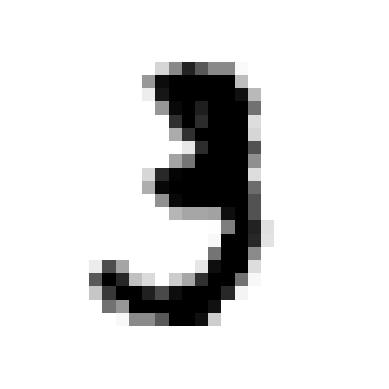

In [5]:
#testar diferentes exemplos
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from collections import Counter

def detect_classes(array:np.ndarray):
    return Counter(array)

classes = detect_classes(y_train)
print(classes)

Counter({np.uint8(1): 6742, np.uint8(7): 6265, np.uint8(3): 6131, np.uint8(2): 5958, np.uint8(9): 5949, np.uint8(0): 5923, np.uint8(6): 5918, np.uint8(8): 5851, np.uint8(4): 5842, np.uint8(5): 5421})


In [9]:
class_names = [
    "0", 
    "1", 
    "2",
    "3", 
    "4",
    "5",
    "6",
    "7",
    "8",
    "9"
]

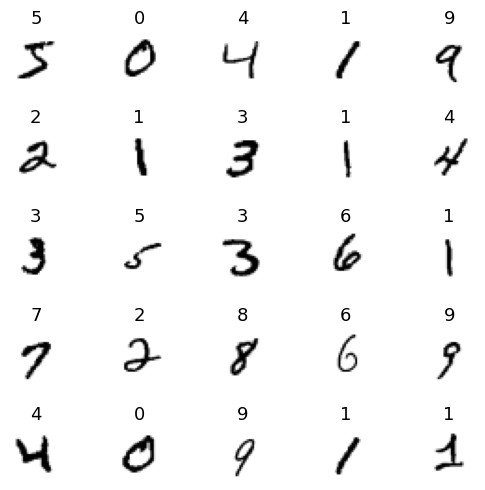

In [10]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

In [11]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/home/mauricio-benjamin/projects/course/ufpi/8-periodo/sistemas-inteligentes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1736380154.766582   70349 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model

<Sequential name=sequential, built=True>

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
hidden1 = model.layers[1]

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

In [19]:
hidden2 = model.layers[2]

In [20]:
weights, biases = hidden2.get_weights()

In [21]:
weights.shape

(300, 100)

In [22]:
biases.shape

(100,)

In [23]:
output = model.layers[3]

In [24]:
weights, biases = output.get_weights()

In [25]:
weights.shape

(100, 10)

In [26]:
biases.shape

(10,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-01-08 20:51:11.832198: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7323 - loss: 1.0061 - val_accuracy: 0.9132 - val_loss: 0.3084
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9129 - loss: 0.3068 - val_accuracy: 0.9306 - val_loss: 0.2432
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9306 - loss: 0.2468 - val_accuracy: 0.9378 - val_loss: 0.2088
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9395 - loss: 0.2131 - val_accuracy: 0.9496 - val_loss: 0.1791
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9501 - loss: 0.1790 - val_accuracy: 0.9560 - val_loss: 0.1614
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9548 - loss: 0.1562 - val_accuracy: 0.9612 - val_loss: 0.1431
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 0.1415 - val_accuracy: 0.9650 - val_loss: 0.1322
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9626 - loss: 0.1318 - val_accurac

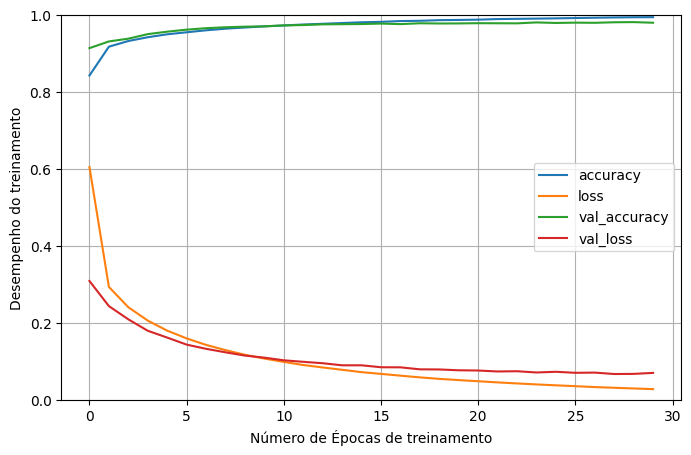

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
  81/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0342

2025-01-08 20:53:04.979415: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0263 - val_accuracy: 0.9802 - val_loss: 0.0672
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9953 - loss: 0.0234 - val_accuracy: 0.9808 - val_loss: 0.0669
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9957 - loss: 0.0222 - val_accuracy: 0.9812 - val_loss: 0.0653
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9962 - loss: 0.0219 - val_accuracy: 0.9802 - val_loss: 0.0652
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9965 - loss: 0.0202 - val_accuracy: 0.9808 - val_loss: 0.0644
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9970 - loss: 0.0182 - val_accuracy: 0.9824 - val_loss: 0.0640
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9969 - loss: 0.0188 - val_accuracy: 0.9798 - val_loss: 0.0660
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9975 - loss: 0.0167 - val_accurac

In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9768 - loss: 0.0812


[0.06766791641712189, 0.9801999926567078]

In [32]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.86, 0.04, 0.  , 0.06, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [33]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [34]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.9802
Kappa:  0.9779916412253373
Matriz de confusão: 
 [[ 969    0    1    0    1    3    1    1    2    2]
 [   0 1125    2    1    0    0    2    2    3    0]
 [   4    3 1006    3    4    0    1    7    4    0]
 [   1    0    6  989    0    6    0    2    3    3]
 [   1    0    3    1  964    0    3    2    0    8]
 [   3    0    0    5    1  876    3    1    1    2]
 [   5    2    1    0    5    6  939    0    0    0]
 [   0    2    5    3    1    0    0 1005    2   10]
 [   5    0    2    5    3    5    4    2  943    5]
 [   1    2    0    4    8    3    1    2    2  986]]


In [37]:
model.save("modelo_mlp.h5")

In [38]:
model.save("modelo_mlp.keras")

In [39]:
model = keras.models.load_model("modelo_mlp.h5")

In [40]:
model = keras.models.load_model("modelo_mlp.keras")

/home/mauricio-benjamin/projects/course/ufpi/8-periodo/sistemas-inteligentes/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [42]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15


2025-01-08 20:56:42.220798: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1707/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1210

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9657 - loss: 0.1209 - val_accuracy: 0.9704 - val_loss: 0.1027
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9791 - loss: 0.0683 - val_accuracy: 0.9706 - val_loss: 0.1230
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0513 - val_accuracy: 0.9680 - val_loss: 0.1500
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9770 - val_loss: 0.1047
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0328 - val_accuracy: 0.9758 - val_loss: 0.1338
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9768 - val_loss: 0.1301
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0232 - val_accuracy: 0.9748 - val_loss: 0.1385
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accurac